In [42]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Times New Roman"]})



In [43]:
results_df_lr = pd.read_csv('models/grid_search_results_lr.csv')

In [44]:
figure_dir = 'figures/'

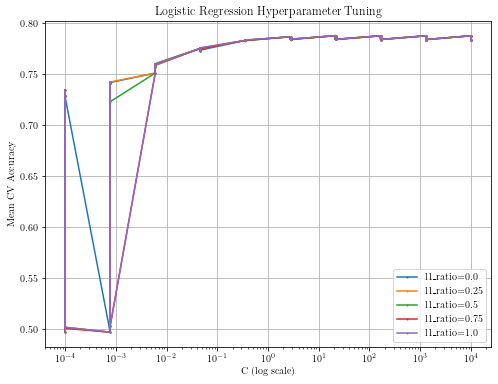

In [45]:
# Filter only Logistic Regression runs
lr_results = results_df_lr[results_df_lr['mean_test_score'].notna()]  # adjust if needed
# For simplicity, let’s look at mean_test_score vs. C for each penalty
plt.figure(figsize=(8,6))

for l1_ratio in lr_results['param_l1_ratio'].unique():
    subset = lr_results[lr_results['param_l1_ratio'] == l1_ratio].dropna()
    plt.plot(
        subset['param_C'].astype(float),
        subset['mean_test_score'],
        marker='o',
        ms=1,
        label=f"l1_ratio={l1_ratio}"
    )

plt.xscale("log")  # since C is log-spaced
plt.xlabel("C (log scale)")
plt.ylabel("Mean CV Accuracy")
plt.title("Logistic Regression Hyperparameter Tuning")
plt.legend()
plt.grid(True)
plt.show()

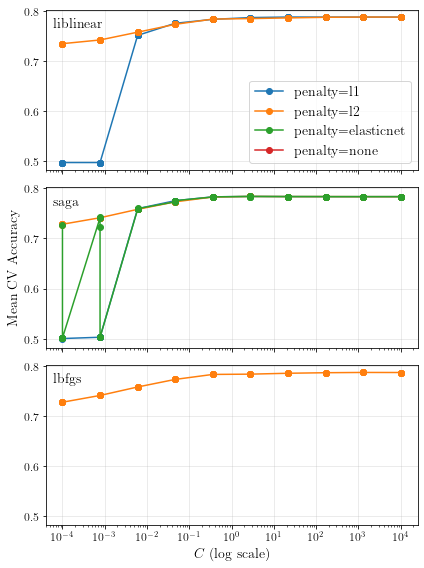

In [38]:
lr_results = results_df_lr[results_df_lr['param_solver'].notna()]  # adjust if needed

solvers = ["liblinear", "saga", "lbfgs"]  # example solvers

fig, axes = plt.subplots(len(solvers), 1, figsize=(6, 8), sharex=True, sharey=True)

for i, solver in enumerate(solvers):
    ax = axes[i]
    subset = lr_results[lr_results['param_solver'] == solver]
    for penalty in subset['param_penalty'].unique():
        data = subset[subset['param_penalty'] == penalty]
        ax.plot(
            data['param_C'].astype(float),
            data['mean_test_score'],
            marker='o',
            label=f"penalty={penalty}"
        )
    ax.set_xscale("log")
    ax.grid(True, alpha=0.3)

    # only bottom plot gets x-label
    if i == len(solvers) - 1:
        ax.set_xlabel(r"$C$ (log scale)", fontsize=14)
    # all share same y-label
    if i == len(solvers)//2:
        ax.set_ylabel("Mean CV Accuracy", fontsize=14)

    # add solver name
    ax.text(0.02, 0.95, solver,
            transform=ax.transAxes,
            fontsize=14, fontweight="bold",
            va="top", ha="left")
    ax.tick_params(axis='both', which='major', labelsize=12)

    # only show legend once (top panel)
    if i == 0:
        ax.legend(fontsize=14)

# remove vertical gaps between plots
plt.subplots_adjust(hspace=0)

plt.tight_layout()
plt.show()
# Save the figure
fig.savefig(f'{figure_dir}/logistic_regression_hyperparameter_tuning.pdf', bbox_inches='tight')

     param_n_neighbors param_algorithm param_weights  param_p  mean_test_score
0                    1            auto       uniform        1         0.757421
60                   1            auto       uniform        1         0.757421
120                  1            auto       uniform        1         0.757421
4                    3            auto       uniform        1         0.775672
64                   3            auto       uniform        1         0.775672
     param_n_neighbors param_algorithm param_weights  param_p  mean_test_score
2                    1            auto       uniform        2         0.750202
62                   1            auto       uniform        2         0.750202
122                  1            auto       uniform        2         0.750202
6                    3            auto       uniform        2         0.771314
66                   3            auto       uniform        2         0.771314
     param_n_neighbors param_algorithm param_weights

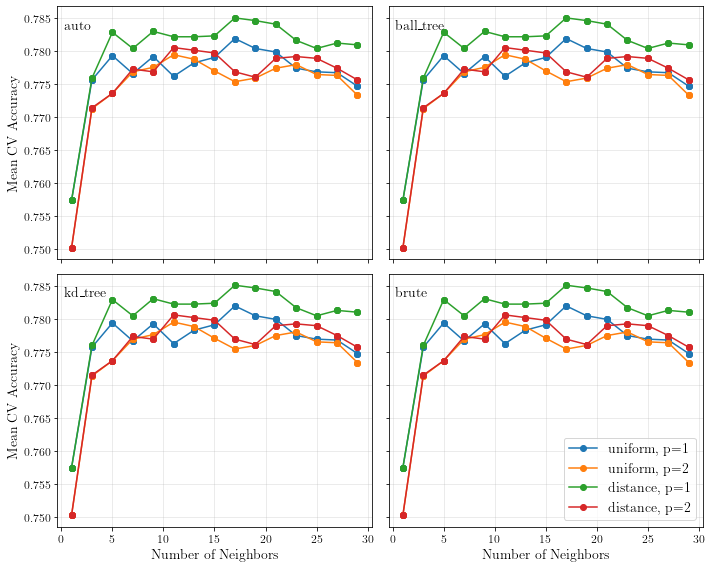

In [39]:
results = pd.read_csv('models/grid_search_results_knc.csv')  # your GridSearchCV results
knn_results = results  # assuming grid was already for KNN

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()
algorithms = knn_results['param_algorithm'].unique()

for i, algo in enumerate(algorithms):
    ax = axes[i] if len(algorithms) > 1 else axes
    subset = knn_results[knn_results['param_algorithm'] == algo]
    
    for weights in subset['param_weights'].unique():
        for p in subset['param_p'].unique():
            data = subset[(subset['param_weights'] == weights) & (subset['param_p'] == p)]
            data = data.sort_values('param_n_neighbors')
            print(data[['param_n_neighbors', 'param_algorithm', 'param_weights', 'param_p', 'mean_test_score']].head())
            ax.plot(data['param_n_neighbors'], data['mean_test_score'], marker='o', label=f"{weights}, p={p}")
    
    ax.text(0.02, 0.95, algo,
            transform=ax.transAxes,
            fontsize=14, fontweight="bold",
            va="top", ha="left")
    ax.grid(True, alpha=0.3)
    if i == 0 or i == len(algorithms)//2:
        ax.set_ylabel("Mean CV Accuracy", fontsize=14)
    if i >= len(algorithms) - 2:
        ax.set_xlabel("Number of Neighbors", fontsize=14)
    if i == len(algorithms) - 1:
        ax.legend(fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()
# Save the figure
fig.savefig(f'{figure_dir}/knn_hyperparameter_tuning.pdf', bbox_inches='tight')

Best Hyperparameters for Decision Tree Classifier:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2} 0.8119015512230048
25
Best for (2, 1): depth=5.0, score=0.8109
13
Best for (2, 2): depth=5.0, score=0.8114
21
Best for (2, 4): depth=5.0, score=0.8111
29
Best for (2, 8): depth=5.0, score=0.8103
26
Best for (5, 1): depth=5.0, score=0.8108
13
Best for (5, 2): depth=5.0, score=0.8114
21
Best for (5, 4): depth=5.0, score=0.8111
29
Best for (5, 8): depth=5.0, score=0.8103
26
Best for (10, 1): depth=5.0, score=0.8108
13
Best for (10, 2): depth=5.0, score=0.8114
21
Best for (10, 4): depth=5.0, score=0.8111
29
Best for (10, 8): depth=5.0, score=0.8103
26
Best for (15, 1): depth=5.0, score=0.8108
16
Best for (15, 2): depth=5.0, score=0.8112
21
Best for (15, 4): depth=5.0, score=0.8111
29
Best for (15, 8): depth=5.0, score=0.8103
17
Best for (2, 1): depth=5.0, score=0.8112
9
Best for (2, 2): depth=5.0, score=0.8115
5
Best for (2, 4): de

/var/folders/21/60kyssdx2kg7z4px7f06z9dr0000gp/T/ipykernel_49549/1308293036.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/21/60kyssdx2kg7z4px7f06z9dr0000gp/T/ipykernel_49549/1308293036.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


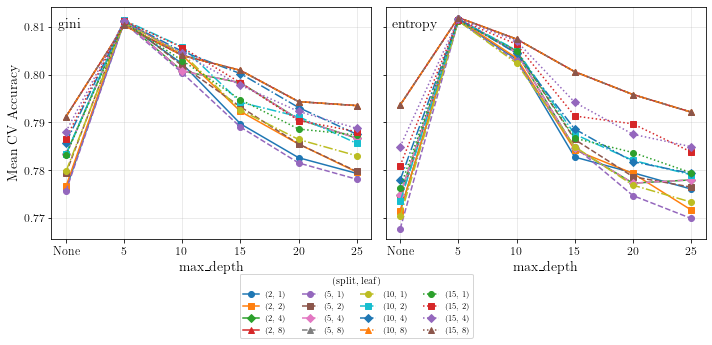

In [40]:
# Example: results from GridSearchCV for Decision Tree
results = pd.read_csv('models/grid_search_results_dtc.csv')  # your GridSearchCV results
dt_results = results  # assuming grid is already for DecisionTreeClassifier

# print the best hyperparameters
best_idx = dt_results['mean_test_score'].idxmax()
best_params = dt_results.loc[best_idx, 'params']
print("Best Hyperparameters for Decision Tree Classifier:")
print(best_params, dt_results.loc[best_idx, 'mean_test_score'])

criteria = dt_results['param_criterion'].unique()
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>']

fig, axes = plt.subplots(1, len(criteria), figsize=(5*len(criteria), 4), sharey=True)

for i, crit in enumerate(criteria):
    ax = axes[i] if len(criteria) > 1 else axes
    subset_crit = dt_results[dt_results['param_criterion'] == crit]

    split_vals = sorted(subset_crit['param_min_samples_split'].unique())
    leaf_vals = sorted(subset_crit['param_min_samples_leaf'].unique())
    style_map = {s: line_styles[j % len(line_styles)] for j, s in enumerate(split_vals)}
    marker_map = {l: markers[j % len(markers)] for j, l in enumerate(leaf_vals)}

    for split in split_vals:
        for leaf in leaf_vals:
            data = subset_crit[
                (subset_crit['param_min_samples_split'] == split) &
                (subset_crit['param_min_samples_leaf'] == leaf) &
                (subset_crit['param_max_features'].isna())  # fix max_features
            ]
            print(data['rank_test_score'].min())

            if not data.empty:
                best_row = data.loc[data['mean_test_score'].idxmax()]
                print(f"Best for ({split}, {leaf}): depth={best_row['param_max_depth']}, score={best_row['mean_test_score']:.4f}")
            if data.empty:
                continue
            ax.plot(
                data['param_max_depth'].astype(str),  # categorical if None included
                data['mean_test_score'],
                linestyle=style_map[split],
                marker=marker_map[leaf],
                label=f"({split}, {leaf})"
            )
    ax.text(0.02, 0.95, crit,
            transform=ax.transAxes,
            fontsize=14, fontweight="bold",
            va="top", ha="left")
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel("max_depth", fontsize=14)
    if i == 0:
        ax.set_ylabel("Mean CV Accuracy", fontsize=14)

    labels = [lab.get_text() for lab in ax.get_xticklabels()]
    labels = ["None" if lab == "nan" else lab for lab in labels]
    # convert to int if possible
    for j, lab in enumerate(labels):
        try:
            labels[j] = str(int(float(lab)))
        except:
            pass
    ax.set_xticklabels(labels)

# Put the legend outside (right side)
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="(split, leaf)",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=4,
    fontsize=8
)

plt.tight_layout()  # leave space on the right
plt.show()
# Save the figure
fig.savefig(f'{figure_dir}/decision_tree_hyperparameter_tuning.pdf', bbox_inches='tight')


In [112]:
((dt_results['param_max_features'] == 'auto') & (dt_results['mean_test_score'] > 0)).sum()

0

/var/folders/21/60kyssdx2kg7z4px7f06z9dr0000gp/T/ipykernel_49549/1996301368.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('param_max_depth', inplace=True)
/var/folders/21/60kyssdx2kg7z4px7f06z9dr0000gp/T/ipykernel_49549/1996301368.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('param_max_depth', inplace=True)
/var/folders/21/60kyssdx2kg7z4px7f06z9dr0000gp/T/ipykernel_49549/1996301368.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

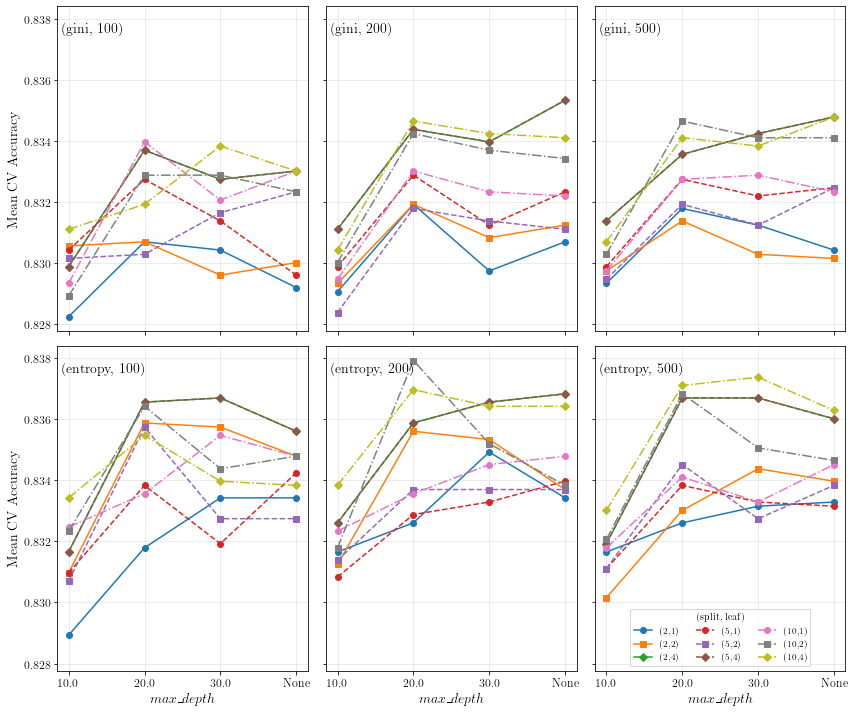

In [41]:
# Load results
results = pd.read_csv('models/grid_search_results_rf.csv')
rf_results = results

criteria = rf_results['param_criterion'].unique()
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>']

fig, axes = plt.subplots(len(criteria), 3, figsize=(12,10), sharex=True, sharey=True)

for i, crit in enumerate(criteria):
    for j, mf in enumerate(rf_results['param_n_estimators'].unique()):
        ax = axes[i, j]
        subset_crit = rf_results[rf_results['param_criterion'] == crit]

        split_vals = sorted(subset_crit['param_min_samples_split'].unique())
        leaf_vals = sorted(subset_crit['param_min_samples_leaf'].unique())
        style_map = {s: line_styles[j % len(line_styles)] for j, s in enumerate(split_vals)}
        marker_map = {l: markers[j % len(markers)] for j, l in enumerate(leaf_vals)}

        for split in split_vals:
            for leaf in leaf_vals:
                data = subset_crit[
                    (subset_crit['param_min_samples_split'] == split) &
                    (subset_crit['param_min_samples_leaf'] == leaf) &
                    (subset_crit['param_max_features'] == 'sqrt') &
                    (subset_crit['param_bootstrap'] == False) &  # fix bootstrap
                    (subset_crit['param_n_estimators'] == mf)  # fix n_estimators
                ]
                data.sort_values('param_max_depth', inplace=True)
                if data.empty:
                    continue
                ax.plot(
                    data['param_max_depth'].astype(str).replace('nan','None'),
                    data['mean_test_score'],
                    linestyle=style_map[split],
                    marker=marker_map[leaf],
                    label=f"({split},{leaf})"
                )
        ax.text(0.02, 0.95, f"({crit}, {mf})",
            transform=ax.transAxes,
            fontsize=14, fontweight="bold",
            va="top", ha="left")
        ax.grid(True, alpha=0.3)
        if i == len(criteria) - 1:
            ax.set_xlabel("$max\\_depth$", fontsize=14)
        if (i == 1 or i == 0) and j == 0:
            ax.set_ylabel("Mean CV Accuracy", fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)

# Add a single legend above all subplots
handles, labels = ax.get_legend_handles_labels()
axes[1,2].legend(handles, labels,
           title="(split, leaf)",
           loc="lower center",
           ncol=3,
           fontsize=9)

plt.tight_layout()
plt.show()
fig.savefig(f'{figure_dir}/random_forest_hyperparameter_tuning.pdf', bbox_inches='tight')

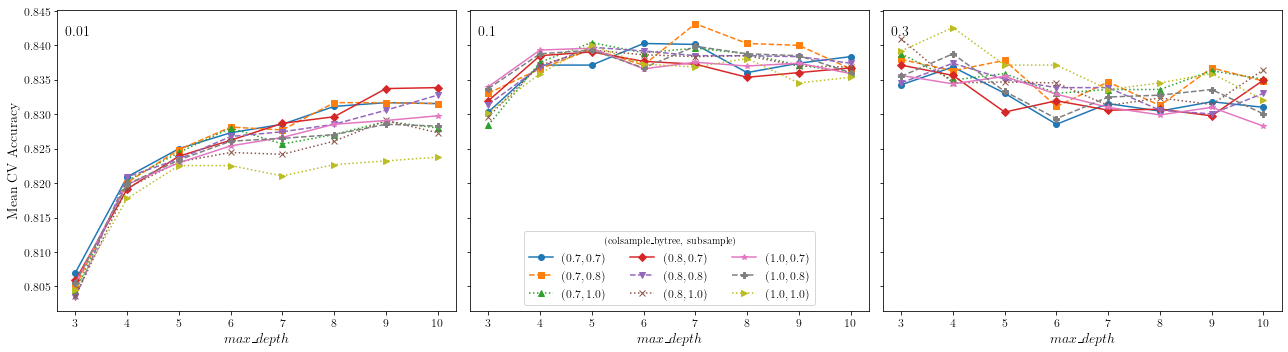

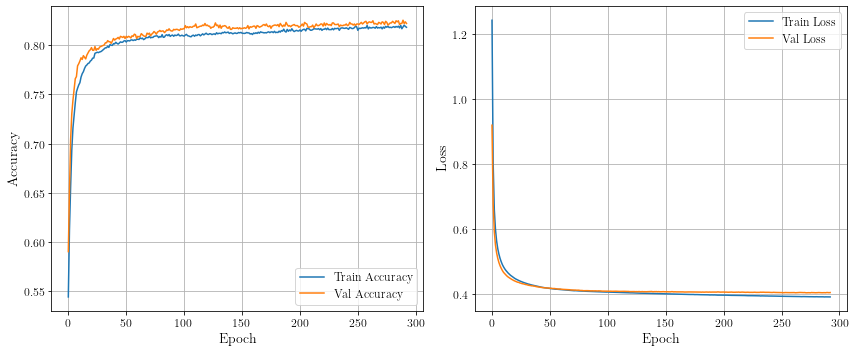

In [222]:
import joblib

history_tnn = joblib.load('models/nn_history.sav')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_tnn['accuracy'], label='Train Accuracy')
plt.plot(history_tnn['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1, 2, 2)
plt.plot(history_tnn['loss'], label='Train Loss')
plt.plot(history_tnn['val_loss'], label='Val Loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig(f'{figure_dir}/tnn_training_history.pdf', bbox_inches='tight')
plt.show()



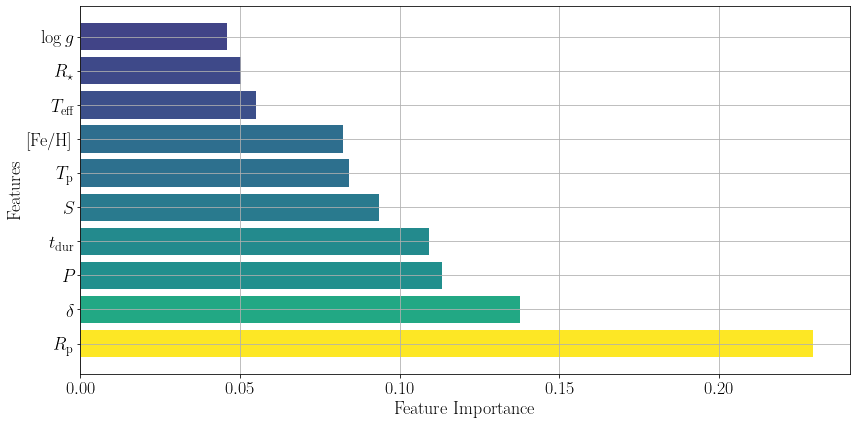

In [23]:
# plot the importance of each feature in the Random Forest model
import numpy as np
import joblib


best_model_rf = joblib.load('models/best_model_rf.sav')
importances = best_model_rf.feature_importances_
feature_names = ['$P$', '$t_\mathrm{dur}$', '$\delta$', '$R_\mathrm{p}$',
              '$T_\mathrm{p}$', '$S$', '$T_\mathrm{eff}$', 'log$\,g$', '$R_\star$', '[Fe/H]']
# Plot feature importances, ordered by importance, descending, color the features by their importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.barh(np.arange(len(importances)), importances[indices], align='center', color=plt.cm.viridis(importances[indices] / max(importances)))
plt.yticks(np.arange(len(importances)), np.array(feature_names)[indices])
plt.xlabel('Feature Importance', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()
plt.savefig(f'{figure_dir}/rf_feature_importances.pdf', bbox_inches='tight')
plt.show()


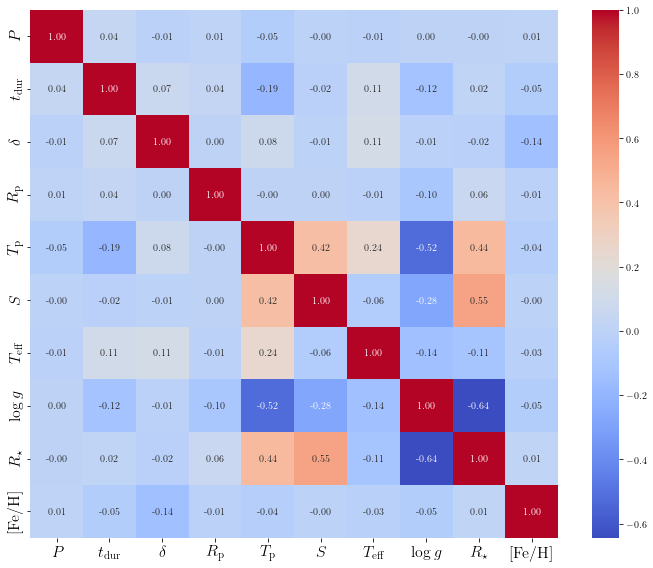

In [35]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Load your KOI data
koi_df = pd.read_csv('output_data/KOI_2025.07.31_cleaned.csv', comment='#')

X = koi_df.drop(columns=['ExoplanetCandidate', 'Unnamed: 0'])

# Create feature names for better readability
feature_names = ['$P$', '$t_\mathrm{dur}$', '$\delta$', '$R_\mathrm{p}$',
                '$T_\mathrm{p}$', '$S$', '$T_\mathrm{eff}$', 'log$\,g$', '$R_\star$', '[Fe/H]']

# Rename columns for correlation matrix
X_renamed = X.copy()
X_renamed.columns = feature_names

# Correlation matrix
corr = X_renamed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            xticklabels=True, yticklabels=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_dir}/feature_correlation_matrix.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained variance per principal component:", explained_variance)

Explained variance per principal component: [0.24543248 0.12999607 0.11316669 0.10530326 0.09954268 0.09539882
 0.08425256 0.06532158 0.03851569 0.02307018]


<Figure size 1152x1152 with 0 Axes>

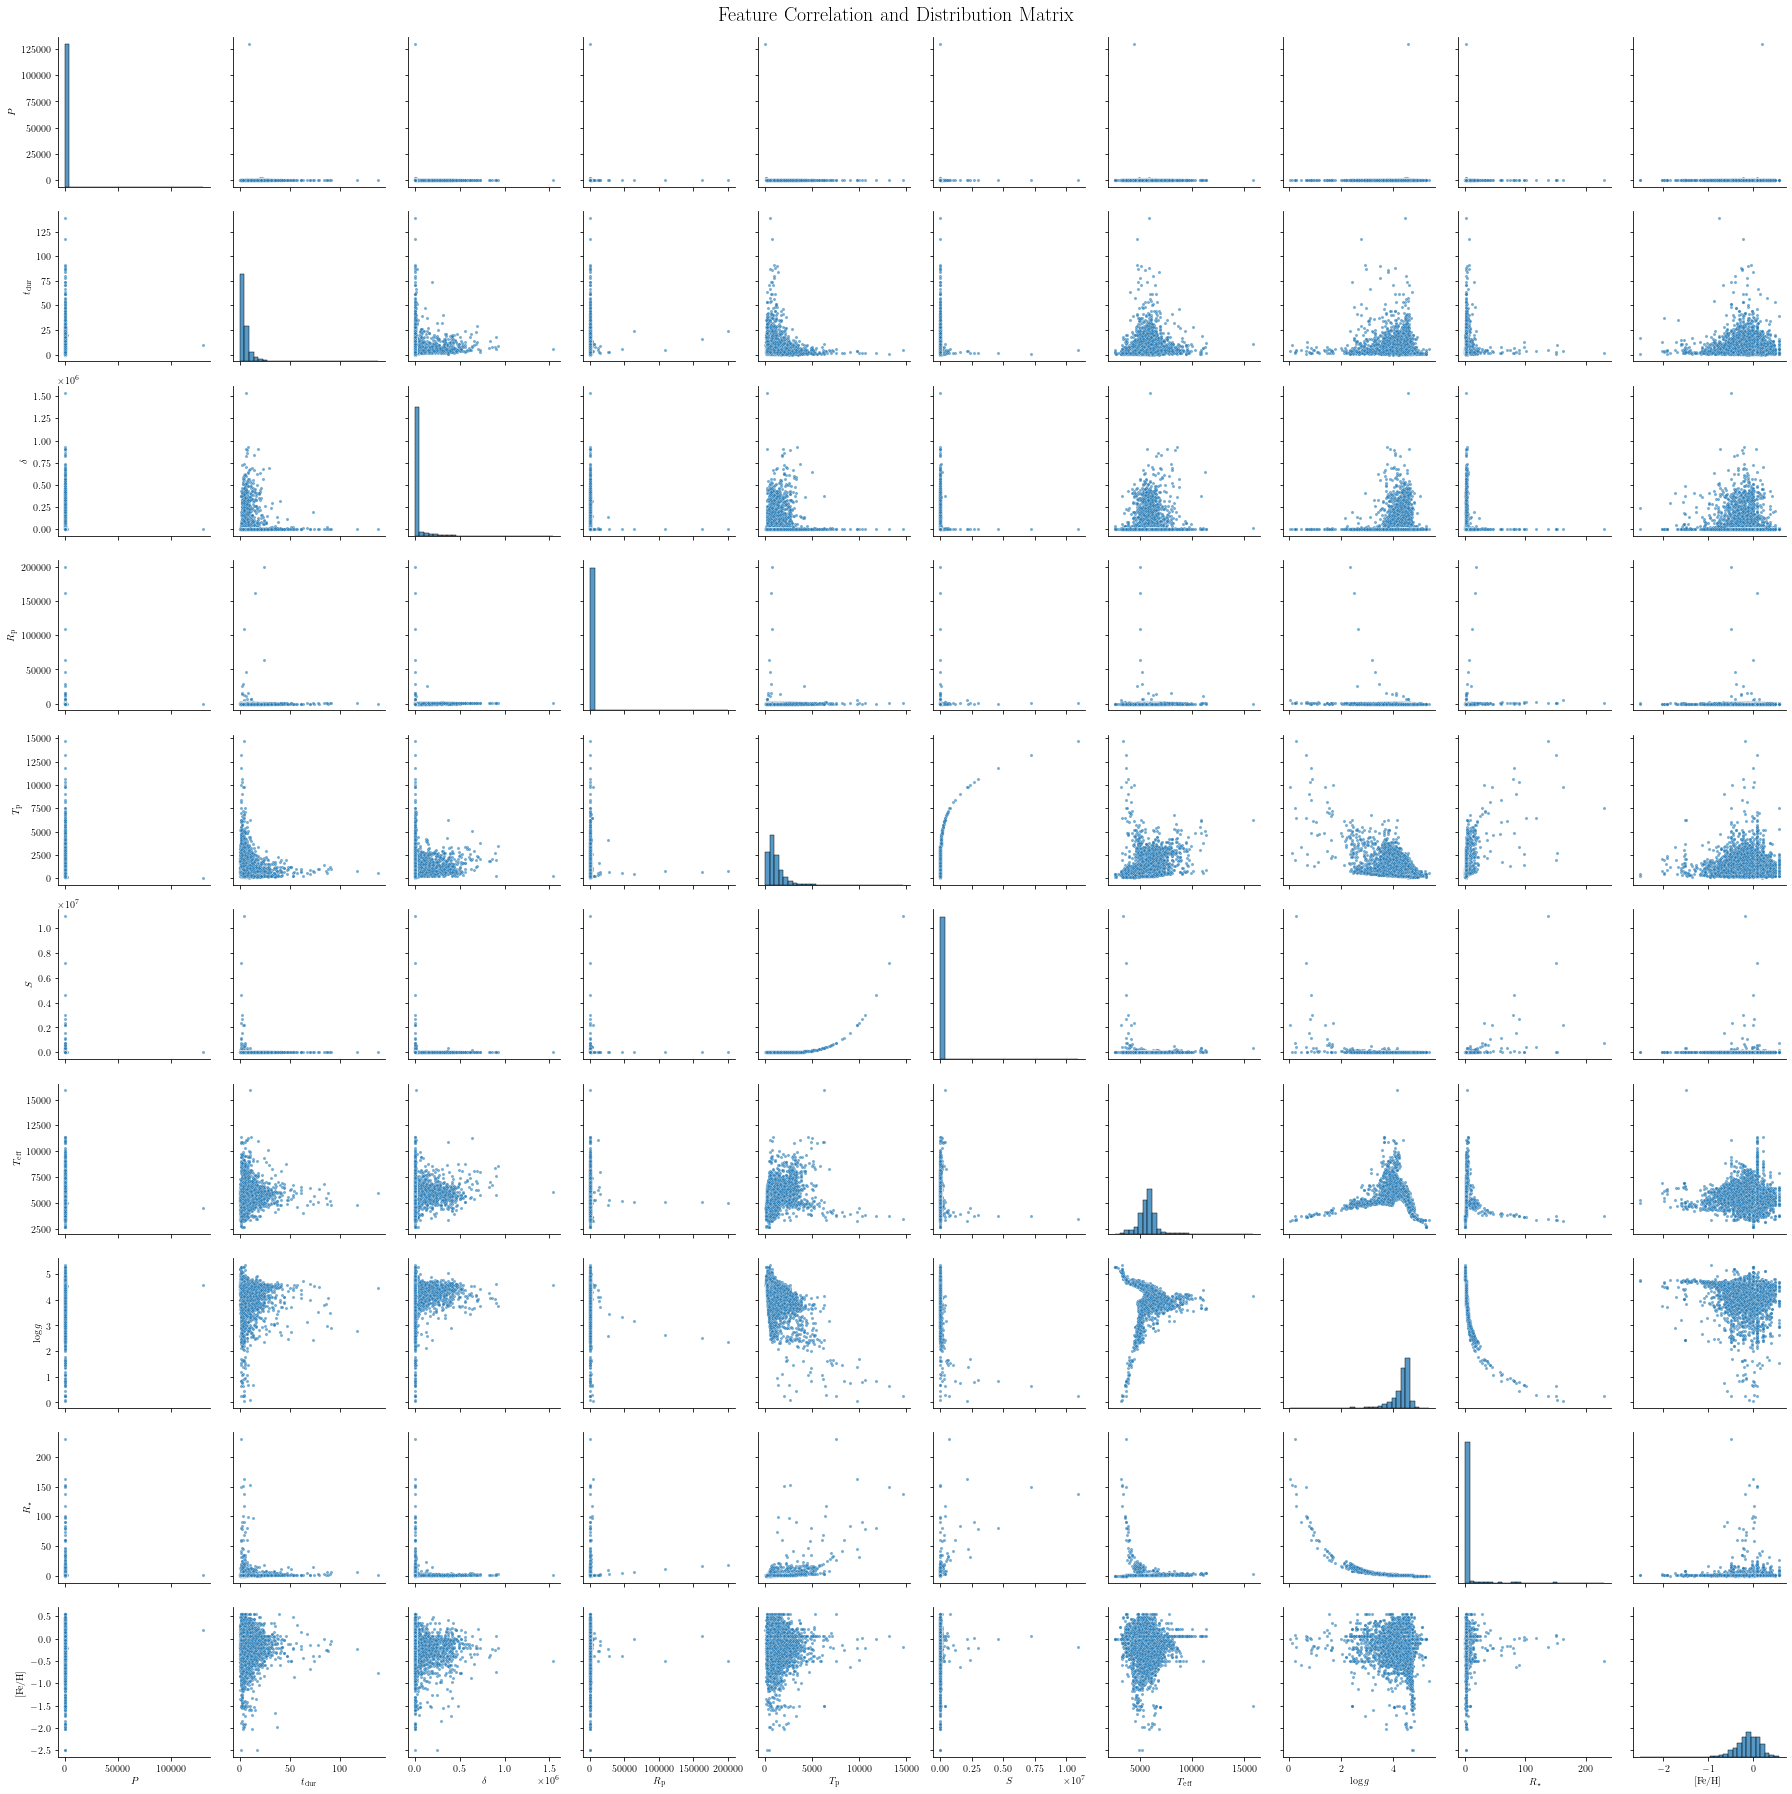

In [30]:
import seaborn as sns
import pandas as pd

# Load your data
koi_df = pd.read_csv('output_data/KOI_2025.07.31_cleaned.csv', comment='#')
X = koi_df.drop(columns=['ExoplanetCandidate', 'Unnamed: 0'])

# Create feature names for better readability
feature_names = ['$P$', '$t_\mathrm{dur}$', '$\delta$', '$R_\mathrm{p}$',
                '$T_\mathrm{p}$', '$S$', '$T_\mathrm{eff}$', 'log$\,g$', '$R_\star$', '[Fe/H]']

# Rename columns for the plot
X_renamed = X.copy()
X_renamed.columns = feature_names

# Create the pairplot
plt.figure(figsize=(16, 16))
g = sns.pairplot(X_renamed, diag_kind='hist', plot_kws={'alpha': 0.6, 's': 10}, 
                 diag_kws={'bins': 30})

# Improve aesthetics
g.fig.suptitle('Feature Correlation and Distribution Matrix', 
               fontsize=20, y=0.995)

# Adjust layout
plt.tight_layout()
plt.savefig(f'{figure_dir}/feature_pairplot_matrix.pdf', bbox_inches='tight', dpi=300)
plt.show()

koi_disposition
FALSE POSITIVE    4562
CONFIRMED         2744
CANDIDATE         1872
Name: count, dtype: int64


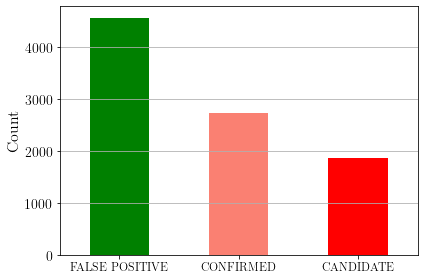

In [17]:
# plot data label distribution

data = pd.read_csv('input_data/KOI_cumulative_2025.07.31_21.17.09.csv', comment='#')
data['ExoplanetCandidate'] = data['koi_disposition'].apply(lambda x: 1 if x == 'CANDIDATE' or x == 'CONFIRMED' else 0)
short_cols = ['koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
              'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_smet', 'ExoplanetCandidate','koi_disposition']

data = data[short_cols].dropna()

print( data['koi_disposition'].value_counts() )
data['koi_disposition'].value_counts().plot(kind='bar', color=['green', 'salmon', 'red'])
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.grid(axis='y')
# supress x-axis title
plt.xlabel('')
# change x-tick labels to 'False Positive' and 'Planet Candidate'
plt.xticks(ticks=[0, 1, 2], labels=['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'], fontsize=12)
plt.tight_layout()
plt.savefig(f'{figure_dir}/koi_disposition_distribution.pdf', bbox_inches='tight')
plt.show()


In [8]:
data.columns

Index(['Unnamed: 0', 'koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad',
       'koi_smet', 'ExoplanetCandidate'],
      dtype='object')

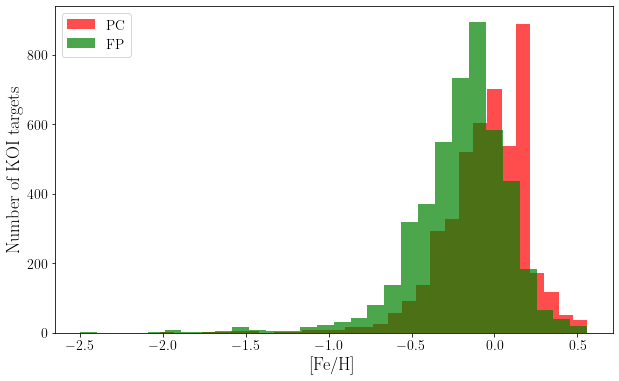

In [19]:
import seaborn as sns
koi_df = pd.read_csv('input_data/KOI_cumulative_2025.07.31_21.17.09.csv', comment='#')
koi_df['ExoplanetCandidate'] = koi_df['koi_disposition'].apply(lambda x: 'PC' if x == 'CANDIDATE' or x == 'CONFIRMED' else 'FP')

# plot histogram of koi_df['koi_smet'] with 50 bins, for confirmed and FP separately
plt.figure(figsize=(10, 6))
sns.histplot(data=koi_df[koi_df['ExoplanetCandidate'] == 'PC'], x='koi_smet', bins=30, color='red', alpha=0.7, edgecolor=None)
sns.histplot(data=koi_df[koi_df['ExoplanetCandidate'] == 'FP'], x='koi_smet', bins=30, color='green', alpha=0.7, edgecolor=None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('[Fe/H]', fontsize=18)
plt.ylabel('Number of KOI targets', fontsize=18)
plt.legend(labels=['PC', 'FP'], fontsize=14, loc='upper left')
plt.savefig(f'{figure_dir}/koi_smet_distribution.pdf', bbox_inches='tight')
plt.show()



In [20]:
from scipy import stats

# Select the two samples
pc_metallicity = koi_df[koi_df['ExoplanetCandidate'] == 'PC']['koi_smet'].dropna()
fp_metallicity = koi_df[koi_df['ExoplanetCandidate'] == 'FP']['koi_smet'].dropna()

# Two-sample KS test
ks_stat, p_value = stats.ks_2samp(pc_metallicity, fp_metallicity)

print("KS statistic:", ks_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("The PC and FP distributions are significantly different.")
else:
    print("No significant difference detected between PC and FP distributions.")

KS statistic: 0.2517580806557372
p-value: 3.3533352659888754e-128
The PC and FP distributions are significantly different.
